Brownian Motion
===============

*Brownian motion* is a stochastic process. One form of the equation for
Brownian motion is

$X(0) = X_0$

$X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$

where $N(a, b; t_1, t_2)$ is a normally distributed random
variable with mean a and variance b. The parameters t,,1,, and t,,2,,
make explicit the statistical independence of *N* on different time
intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are
disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3,
t_4)$ are independent.

The calculation is actually very simple. A naive implementation that
prints *n* steps of the Brownian motion might look like this:

In [1]:
from scipy.stats import norm

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 20

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    print(k)
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)

0
0.0006684199565708064
1
0.012253648640624542
2
0.014665195272452993
3
0.0044117040245733995
4
-0.001672960970314761
5
0.0006532376420279504
6
0.006299956284929983
7
0.005488220660319107
8
-0.00533172527093425
9
-0.005855584897213418
10
0.005774956206669494
11
0.005156679302171601
12
0.013079319793741164
13
0.008858190289535614
14
0.013384450031344464
15
0.011416724865143859
16
0.006886707142524934
17
-0.002132907128230165
18
0.004340819401569042
19
0.0057823179904487425


The above code could be easily modified to save the iterations in an
array instead of printing them.

The problem with the above code is that it is slow. If we want to
compute a large number of iterations, we can do much better. The key is
to note that the calculation is the cumulative sum of samples from the
normal distribution. A fast version can be implemented by first
generating all the samples from the normal distribution with one call to
scipy.stats.norm.rvs(), and then using the numpy *cumsum* function to
form the cumulative sum.

The following function uses this idea to implement the function
*brownian()*. The function allows the initial condition to be an array
(or anything that can be converted to an array). Each element of *x0* is
treated as an initial condition for a Brownian motion.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

### Example

Here's a script that uses this function and matplotlib's pylab module to
plot several realizations of Brownian motion.

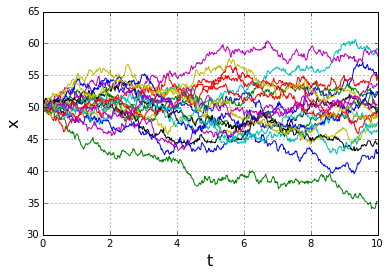

In [3]:
%matplotlib inline
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

### 2D Brownian Motion

The same function can be used to generate Brownian motion in two
dimensions, since each dimension is just a one-dimensional Brownian
motion.

The following script provides a demo.

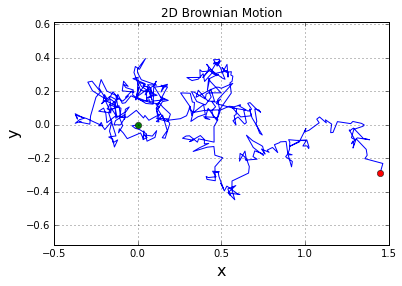

In [5]:
%matplotlib inline
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])
    
# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()